In [3]:
from collections import defaultdict
import polars as pl
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

df = pl.read_csv("../../Data/Titanic/advancedDataframe.csv")

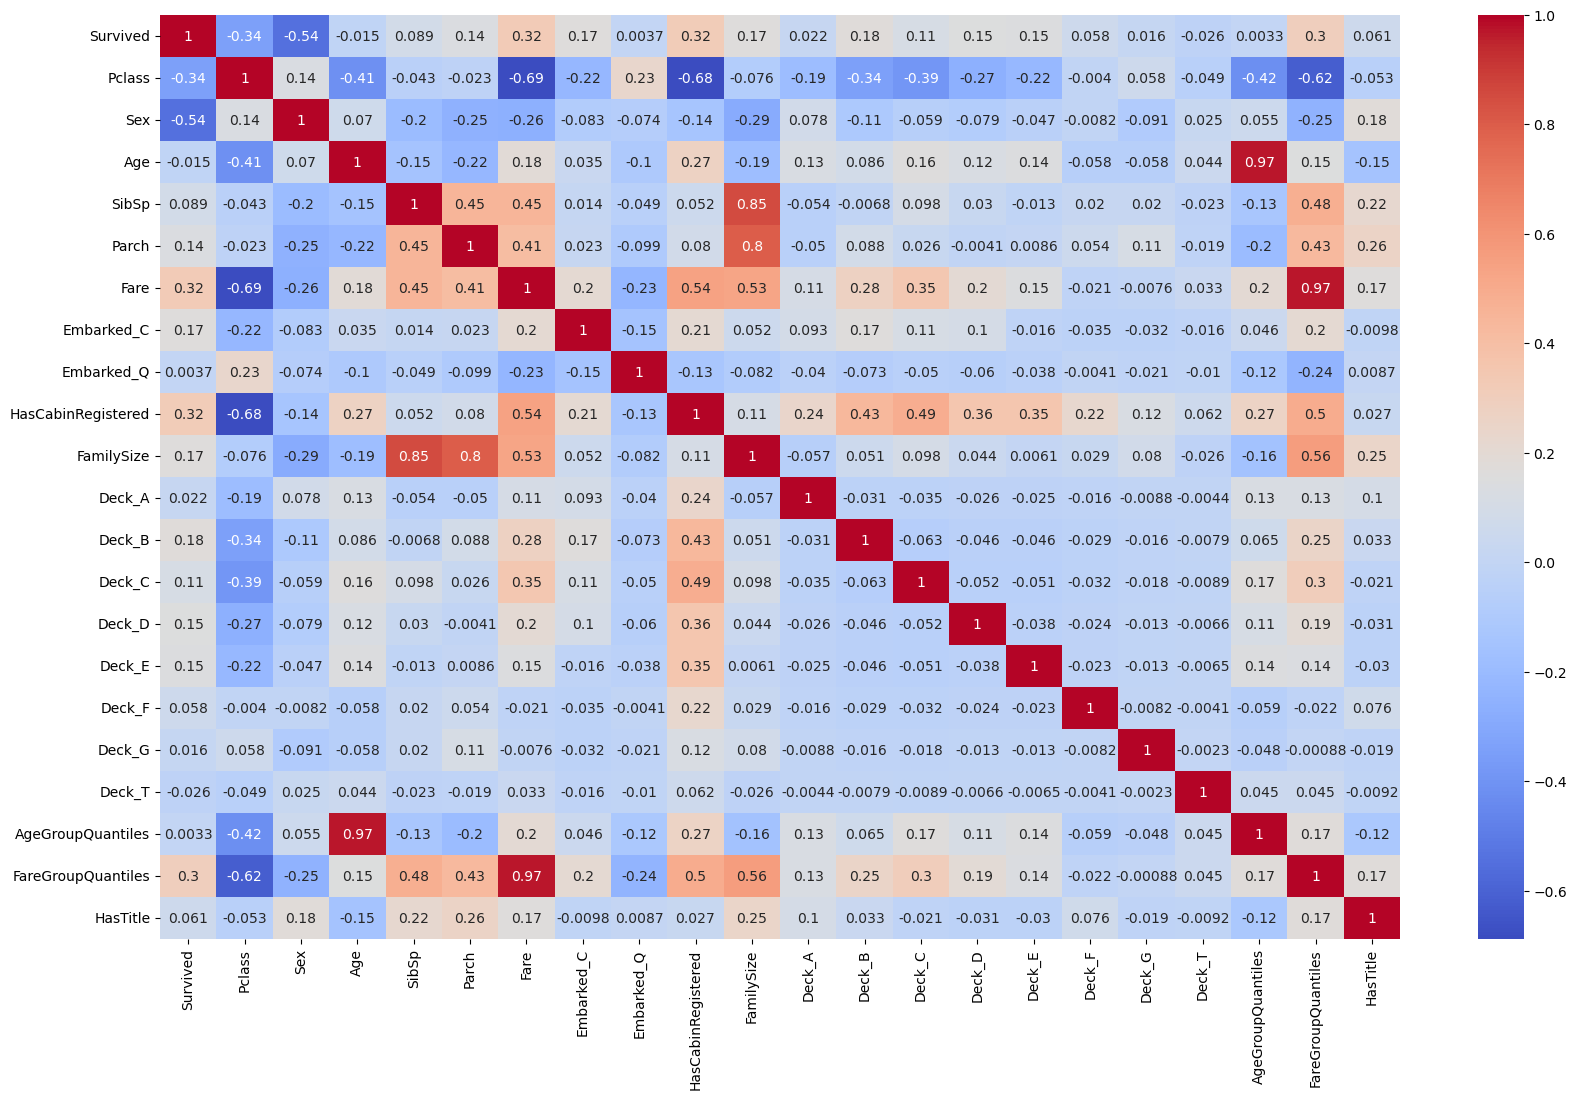

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def heatmap(df, figsize=(20, 12), method="spearman"):
    corr_matrix = df.select(
        pl.col(pl.selectors.NUMERIC_DTYPES)
    ).to_pandas().corr(method=method)

    plt.figure(figsize=figsize)
    sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")

heatmap(df)

In [5]:
class LassoClassifierCV:
    def __init__(self, cv=5, c_values=[0.001, 0.01, 0.1, 1, 10], random_state=42):
        self.cv = cv
        self.models = defaultdict(list) 
        self.c_values = c_values
        self.best_estimator = None
        self.random_state = random_state
        self.results = defaultdict(list)
    
    def fit(self, X, y):
        cv = KFold(n_splits=self.cv)
        features=list(X.columns)
        best_score = -1
        
        for c in self.c_values:
            model = LogisticRegression(C=c, penalty="l1", solver="liblinear", random_state=self.random_state)
            for train_indices, test_indices in cv.split(X, y):
                model.fit(X[train_indices], y[train_indices])
                y_pred = model.predict(X[test_indices])
                score = accuracy_score(y_pred=y_pred, y_true=y[test_indices])
                
                self.models[f"model_splits_c{c}"].append(model)
                coefs = model.coef_.flatten()
                for feature, coef in zip(features, coefs):
                    self.results[f"{feature}_c{c}"].append(coef)
                self.results[f"score_splits_c{c}"].append(score)
                if score > best_score:
                    best_score = score
                    self.best_estimator = model

        return self 
    
    def report(self):
        report = pl.DataFrame(self.results)
        report = pl.concat([report, report.mean()], how="vertical")
        return report

    def plot(self):
        return pl.DataFrame(self.results).mean()
        
    def predict(X):
        pass

    def _get_formula():
        pass


In [6]:
df = df.drop("Title")

In [7]:
thing = LassoClassifierCV(c_values=[0.01, 0.02, 0.05, 0.07, 1])

X, y = df.drop("Survived"), df["Survived"]

model = LassoClassifierCV().fit(X, y)
model.report()

Pclass_c0.001,Sex_c0.001,Age_c0.001,SibSp_c0.001,Parch_c0.001,Fare_c0.001,Embarked_C_c0.001,Embarked_Q_c0.001,HasCabinRegistered_c0.001,FamilySize_c0.001,Deck_A_c0.001,Deck_B_c0.001,Deck_C_c0.001,Deck_D_c0.001,Deck_E_c0.001,Deck_F_c0.001,Deck_G_c0.001,Deck_T_c0.001,AgeGroupQuantiles_c0.001,FareGroupQuantiles_c0.001,HasTitle_c0.001,score_splits_c0.001,Pclass_c0.01,Sex_c0.01,Age_c0.01,SibSp_c0.01,Parch_c0.01,Fare_c0.01,Embarked_C_c0.01,Embarked_Q_c0.01,HasCabinRegistered_c0.01,FamilySize_c0.01,Deck_A_c0.01,Deck_B_c0.01,Deck_C_c0.01,Deck_D_c0.01,Deck_E_c0.01,…,Embarked_Q_c1,HasCabinRegistered_c1,FamilySize_c1,Deck_A_c1,Deck_B_c1,Deck_C_c1,Deck_D_c1,Deck_E_c1,Deck_F_c1,Deck_G_c1,Deck_T_c1,AgeGroupQuantiles_c1,FareGroupQuantiles_c1,HasTitle_c1,score_splits_c1,Pclass_c10,Sex_c10,Age_c10,SibSp_c10,Parch_c10,Fare_c10,Embarked_C_c10,Embarked_Q_c10,HasCabinRegistered_c10,FamilySize_c10,Deck_A_c10,Deck_B_c10,Deck_C_c10,Deck_D_c10,Deck_E_c10,Deck_F_c10,Deck_G_c10,Deck_T_c10,AgeGroupQuantiles_c10,FareGroupQuantiles_c10,HasTitle_c10,score_splits_c10
f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,-0.015867,0.0,0.0,0.008766,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.614525,-0.042808,0.0,-0.026674,0.0,0.0,0.017526,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.046716,0.211238,-0.427367,0.0,0.311522,-0.131183,0.432455,1.179076,0.213158,0.0,0.0,0.087147,0.504282,1.678614,0.804469,-0.609523,-2.975365,-0.04464,-0.229136,-0.136624,0.001919,0.570492,0.150246,0.0,-0.279411,-0.112662,0.6997,-0.096437,0.87993,1.627137,1.152658,-1.104139,-1.564053,0.127435,0.467149,1.800732,0.793296
0.0,0.0,-0.014757,0.0,0.0,0.004459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.651685,-0.075177,0.0,-0.021841,0.0,0.0,0.011235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.0,0.784262,-0.24896,0.0,0.0,-0.114221,0.336895,0.844849,0.0,0.0,0.0,0.358577,0.174727,1.769726,0.803371,-0.713145,-3.174284,-0.062896,-0.321878,0.0,0.002698,0.472407,0.0,0.693844,-0.239894,-0.087423,0.003095,-0.250495,0.636152,1.151121,-0.0023,1.598648,0.0,0.380079,0.087111,1.946305,0.814607
0.0,0.0,-0.01705,0.0,0.0,0.007553,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.646067,-0.006558,0.0,-0.030604,0.0,0.0,0.016505,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.066785,0.602671,-0.362091,0.0,0.0,0.0,0.729171,0.815363,0.0,-0.762546,0.0,0.200696,0.323923,1.730059,0.780899,-0.420465,-3.122906,-0.057793,-0.22767,0.0,0.005231,0.284785,0.139077,0.504851,-0.352542,0.225936,0.0,0.0,1.078196,1.224869,0.42368,-2.145291,-1.35128,0.235967,0.259622,1.863019,0.769663
0.0,0.0,-0.015279,0.0,0.0,0.005391,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.646067,-0.002847,0.0,-0.027622,0.0,0.0,0.012479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.368102,0.532017,-0.141176,0.0,0.201883,0.0,0.727528,1.028686,0.014572,-0.426363,0.0,0.496969,0.288557,1.658697,0.797753,-0.439113,-3.18738,-0.082789,-0.499556,0.0,0.001914,0.235886,0.486691,0.383576,-0.129304,-0.295791,0.574816,0.0,1.138415,1.503004,0.681471,-1.42514,-1.11733,0.583964,0.244833,1.772423,0.792135
0.0,0.0,-0.013252,0.0,0.0,0.004937,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.691011,-0.007375,0.0,-0.024594,0.0,0.0,0.011693,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.156189,0.647184,-0.338645,0.0,0.0,-0.452477,0.482905,0.522141,0.032374,-0.209823,0.0,0.191847,0.309287,1.715009,0.837079,-0.614849,-3.001633,-0.050813,-0.17565,0.0,0.001407,0.221035,0.233238,0.550184,-0.327613,0.0,0.218721,-0.502384,0.861651,0.884,0.709809,-1.221585,-1.817352,0.23823,0.248881,1.882398,0.831461
0.0,0.0,-0.015241,0.0,0.0,0.006221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.649871,-0.026953,0.0,-0.026267,0.0,0.0,0.013887,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,…,0.127558,